In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
mymodel=SentimentIntensityAnalyzer()

In [3]:
df=pd.read_csv("cleaned_customer_support_data.csv")

In [4]:
df_clean = df.dropna(subset=['customer_remarks'])

In [5]:
# Optional: Sample to speed up processing (e.g., 200 rows)
sample_size = min(2000, len(df_clean))
sampled_remarks = df_clean['customer_remarks'].sample(sample_size, random_state=42)


In [11]:
# Function to get sentiment category
def get_sentiment(text):
    score = mymodel.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to the DataFrame
df['sentiment'] = df['customer_remarks'].apply(get_sentiment)

In [16]:
print(df[['customer_remarks', 'sentiment']].head())

  customer_remarks sentiment
0              NaN   Neutral
1              NaN   Neutral
2              NaN   Neutral
3              NaN   Neutral
4              NaN   Neutral


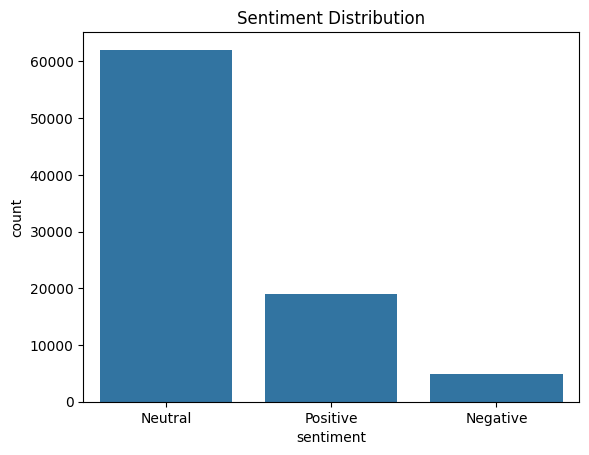

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Distribution")
plt.show()

In [17]:
df.to_csv('sentiment_results.csv', index=False)